In [12]:
import pickle
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import mlab
import seaborn as sns
%matplotlib inline

mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

In [13]:
def RCRPM_loading(RC,RPM,filename,endtype,densitypath):
    with open(densitypath+filename+endtype+'_readcounts.pickle', 'rb') as f:
        RC[filename]=pickle.load(f)
    with open(densitypath+filename+endtype+'_rpm.pickle', 'rb') as f:
        RPM[filename]=pickle.load(f)
    #return [rcs,rpms]

In [14]:
import multiprocessing
import pickle
import threading
from datetime import datetime

#RC ={} somehow I need to do below to assign this dict to get the value evalutated from the RCRPM_loading
#RPM = {} somehow I need to do below to assign this dict to get the value evalutated from the RCRPM_loading
manager = multiprocessing.Manager()
RC = manager.dict()
RPM = manager.dict()

jobs = []

    
filenames = ['ks'+str(x) for x in range(5,17)]
endtype = '_3map'
densitypath = '/home/kazuki/^profilingdata/20160420_reanalyze/density/'
for filename in filenames:
    job = multiprocessing.Process(target=RCRPM_loading, args=(RC,RPM,filename,endtype,densitypath))
    jobs.append(job)
    job.start()   
    
    
filenames = ['ks'+str(x) for x in range(31,43)]
endtype = '_3map'
densitypath = '/home/kazuki/^profilingdata/20161108_reanalyze/density/'
for filename in filenames:
    job = multiprocessing.Process(target=RCRPM_loading, args=(RC,RPM,filename,endtype,densitypath))
    jobs.append(job)
    job.start()     
    
    
[job.join() for job in jobs] # just to get the time by the below line

print('done')

done


In [15]:
def rpm_plot_minus(upstream, downstream, readcounts):
    xaxis = range(upstream, downstream+1)
    yaxis =[0 for x in range(upstream, downstream+1)]
    i = 0
    g = upstream-1
    totalread = sum(readcounts)
    while g < downstream:
        yaxis[i]=(readcounts[g]*1E6)/float(totalread)
        i+=1
        g+=1
    yaxis.reverse() 
        # because negative strand
        # x axis is still from upstream to downstrem
        # matplotlib make a bar graph with x axis from smaller number 
        # so the correspondance of x axis and y axis is reversed on the plot
        # I did not yet look for to change the labelling of x axis... 
    return [xaxis,yaxis]

In [16]:
def rpm_plot_plus(upstream, downstream, readcounts):
    xaxis = range(upstream, downstream+1)
    yaxis =[0 for x in range(upstream, downstream+1)]
    i = 0
    g = upstream-1
    totalread = sum(readcounts)
    while g < downstream:
        yaxis[i]=(readcounts[g]*1E6)/float(totalread)
        i+=1
        g+=1 
    return [xaxis,yaxis]

In [17]:
##########

<BarContainer object of 1026 artists>

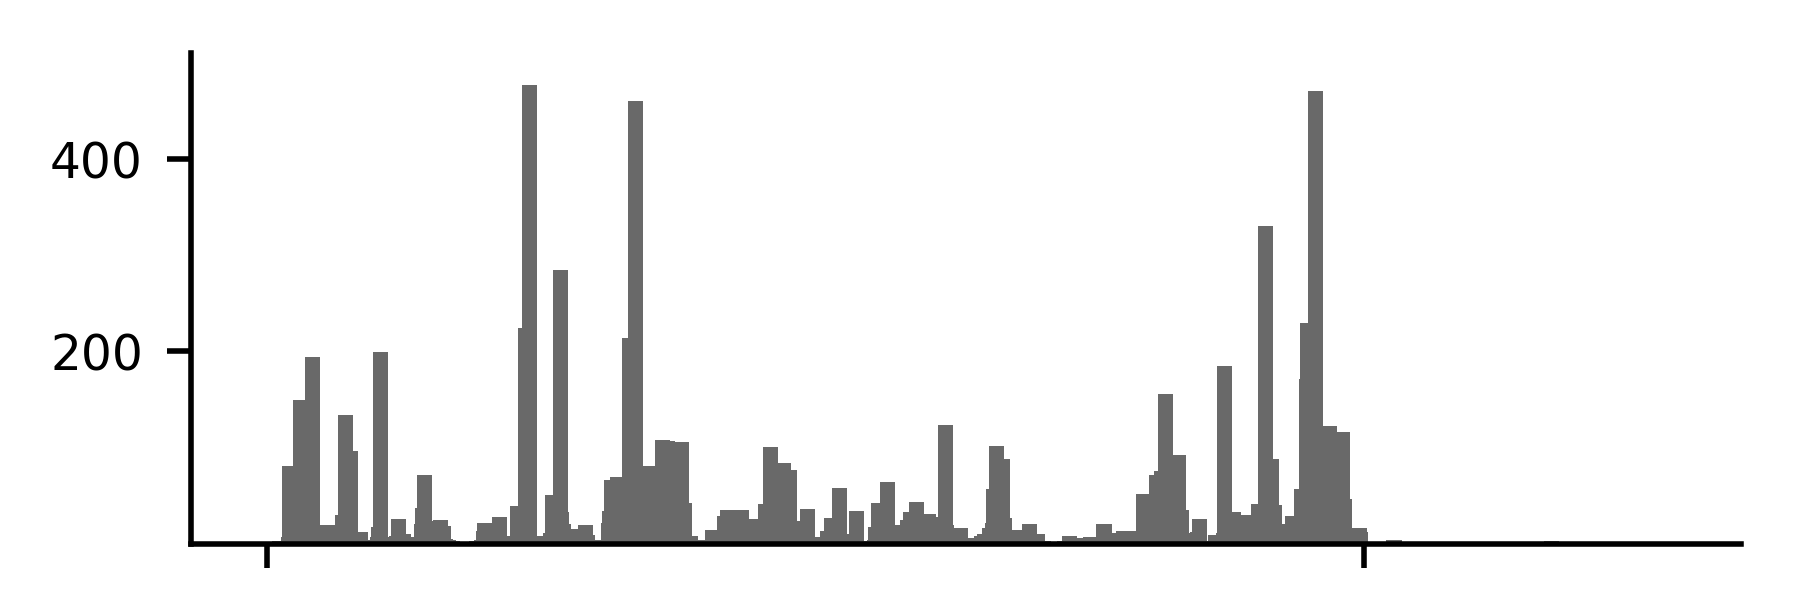

In [18]:
# rpsB
# for plus strand

AUG = 189874
length = 726
up_distance = 50
down_distance = 250
upstream = AUG-up_distance
downstream = AUG+length+down_distance-1

x_data = [x for x in range (1,length+up_distance+down_distance+1)]

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 1.3)
plt.xticks([up_distance,up_distance+length],['',''])
plt.xlim(0,up_distance+length+down_distance)
plt.yticks([200,400])
plt.ylim(0,510)
plt.tick_params(labelsize=7)
sns.despine()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

readcounts = RC['ks7'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
plt.bar(x_data,data[1], linewidth = 0, width=10, color="dimgrey")

#plt.savefig('figs_rpm/fig_rpm_rpsB_NaCl_WT_frr.pdf', dpi=500)

<BarContainer object of 1026 artists>

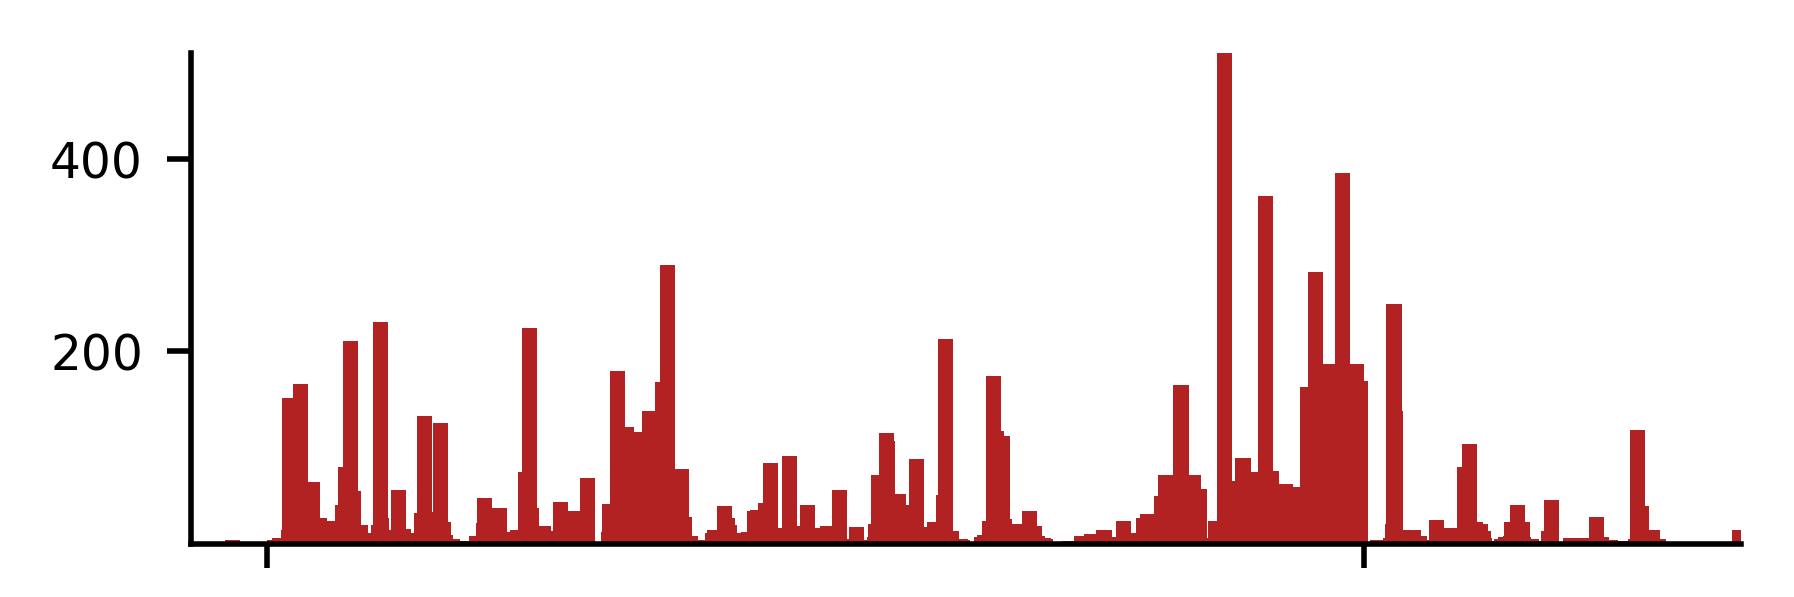

In [19]:
# rpsB
# for plus strand

AUG = 189874
length = 726
up_distance = 50
down_distance = 250
upstream = AUG-up_distance
downstream = AUG+length+down_distance-1

x_data = [x for x in range (1,length+up_distance+down_distance+1)]

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 1.3)
plt.xticks([up_distance,up_distance+length],['',''])
plt.xlim(0,up_distance+length+down_distance)
plt.yticks([200,400])
plt.ylim(0,510)
plt.tick_params(labelsize=7)
sns.despine()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

readcounts = RC['ks10'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
plt.bar(x_data,data[1], linewidth = 0, width=10, color="firebrick")

#plt.savefig('figs_rpm/fig_rpm_rpsB_NaCl_KD_frr.pdf', dpi=500)

# tmRNA

<BarContainer object of 270 artists>

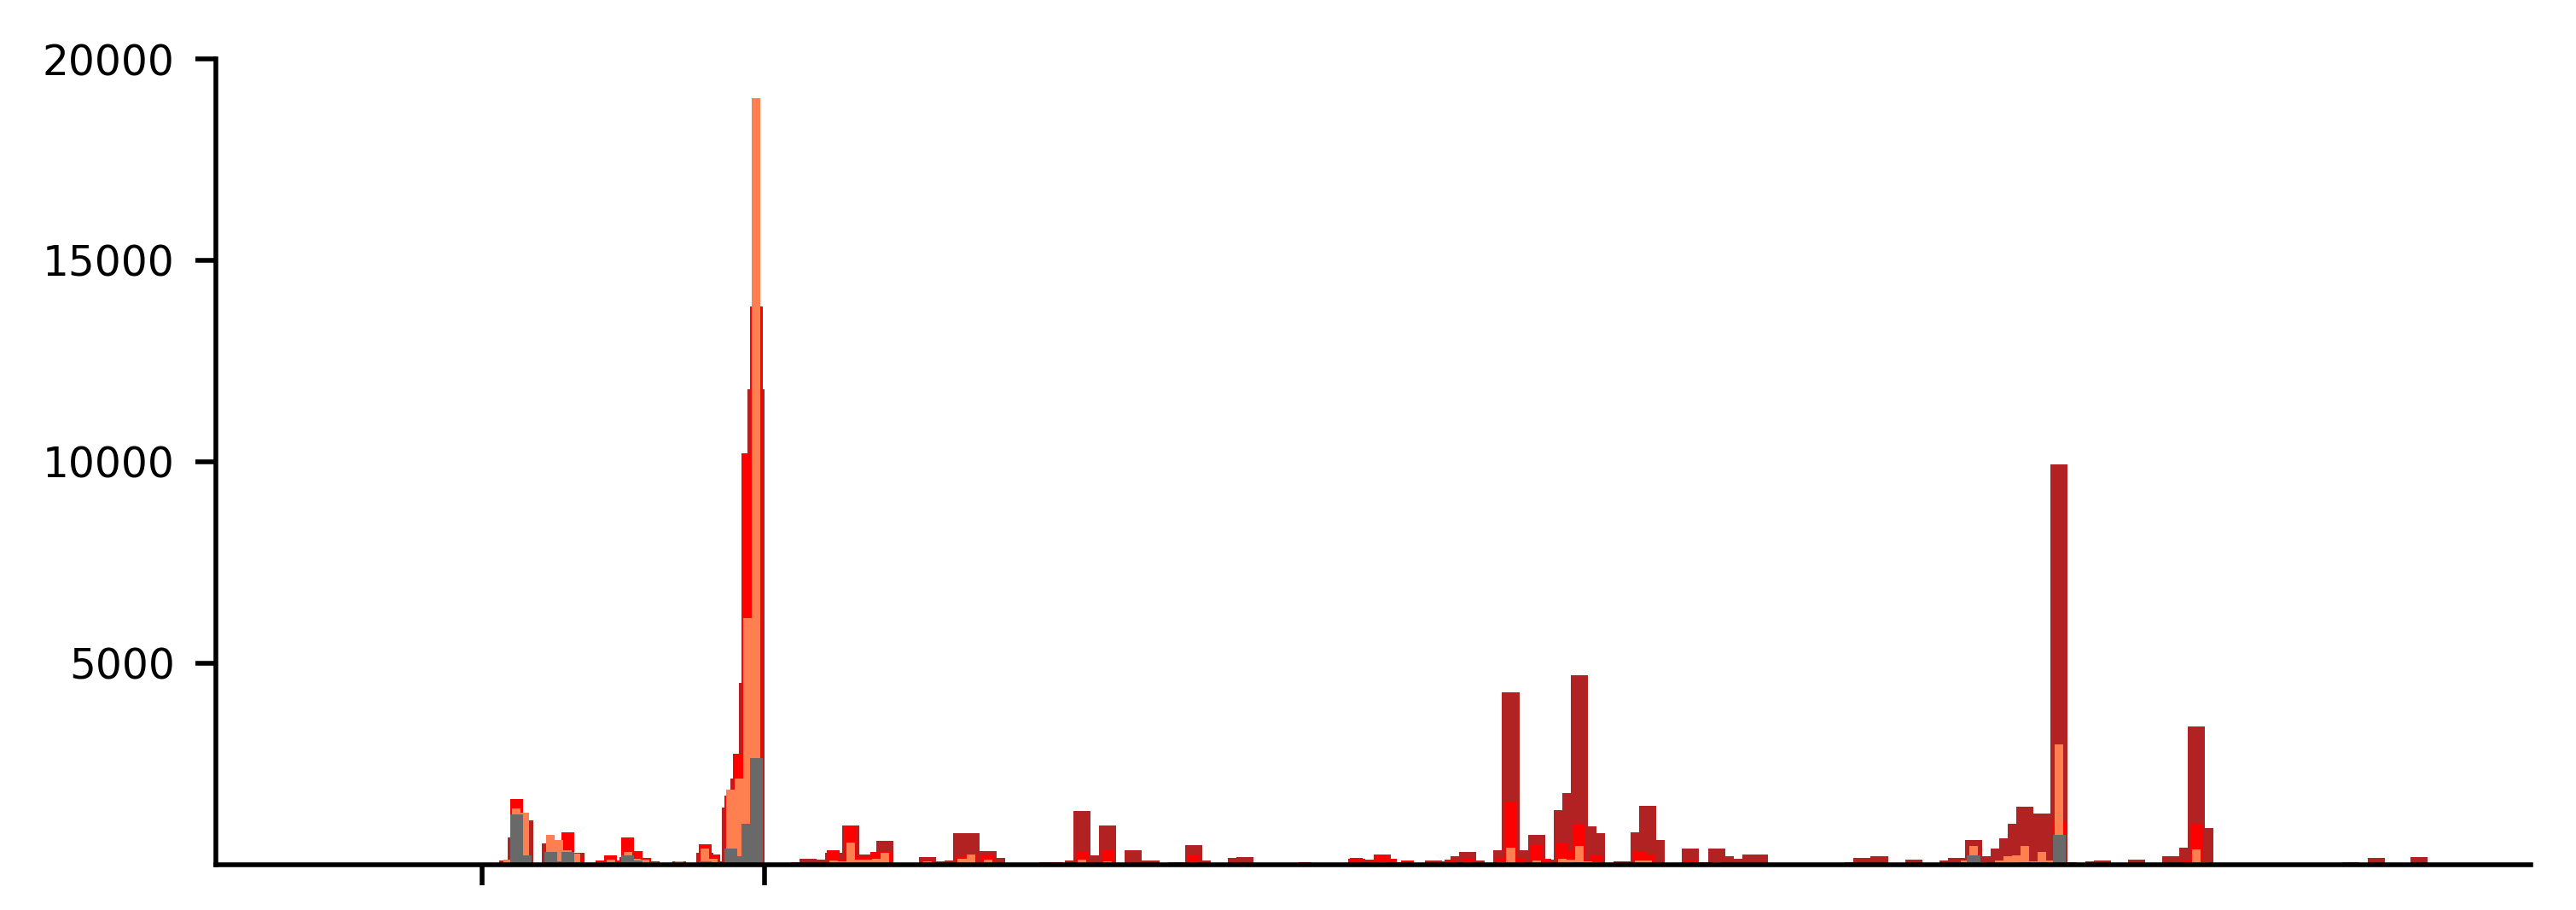

In [20]:
# for plus strand
AUG = 2753704
length = 33
up_distance = 20
down_distance = 217
upstream = AUG-up_distance
downstream = AUG+length+down_distance-1

x_data = [x for x in range (1,length+up_distance+down_distance+1)]

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(7, 2.5)
plt.xticks([up_distance+11,up_distance+length+11],['',''])
plt.xlim(0,up_distance+length+down_distance)
plt.yticks([5000,10000,15000,20000])
plt.ylim(0,20000)
plt.tick_params(labelsize=7)
sns.despine()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

readcounts = RC['ks10'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
plt.bar(x_data,data[1], linewidth = 0, width=2, color="firebrick")

readcounts = RC['ks9'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
plt.bar(x_data,data[1], linewidth = 0, width=1.5, color="red")

readcounts = RC['ks8'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
plt.bar(x_data,data[1], linewidth = 0, width=1, color="coral")

readcounts = RC['ks7'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
plt.bar(x_data,data[1], linewidth = 0, width=1.5, color="dimgrey")

#plt.savefig('figs_rpm/fig_rpm_tmRNA_normal.pdf', dpi=500)

<BarContainer object of 270 artists>

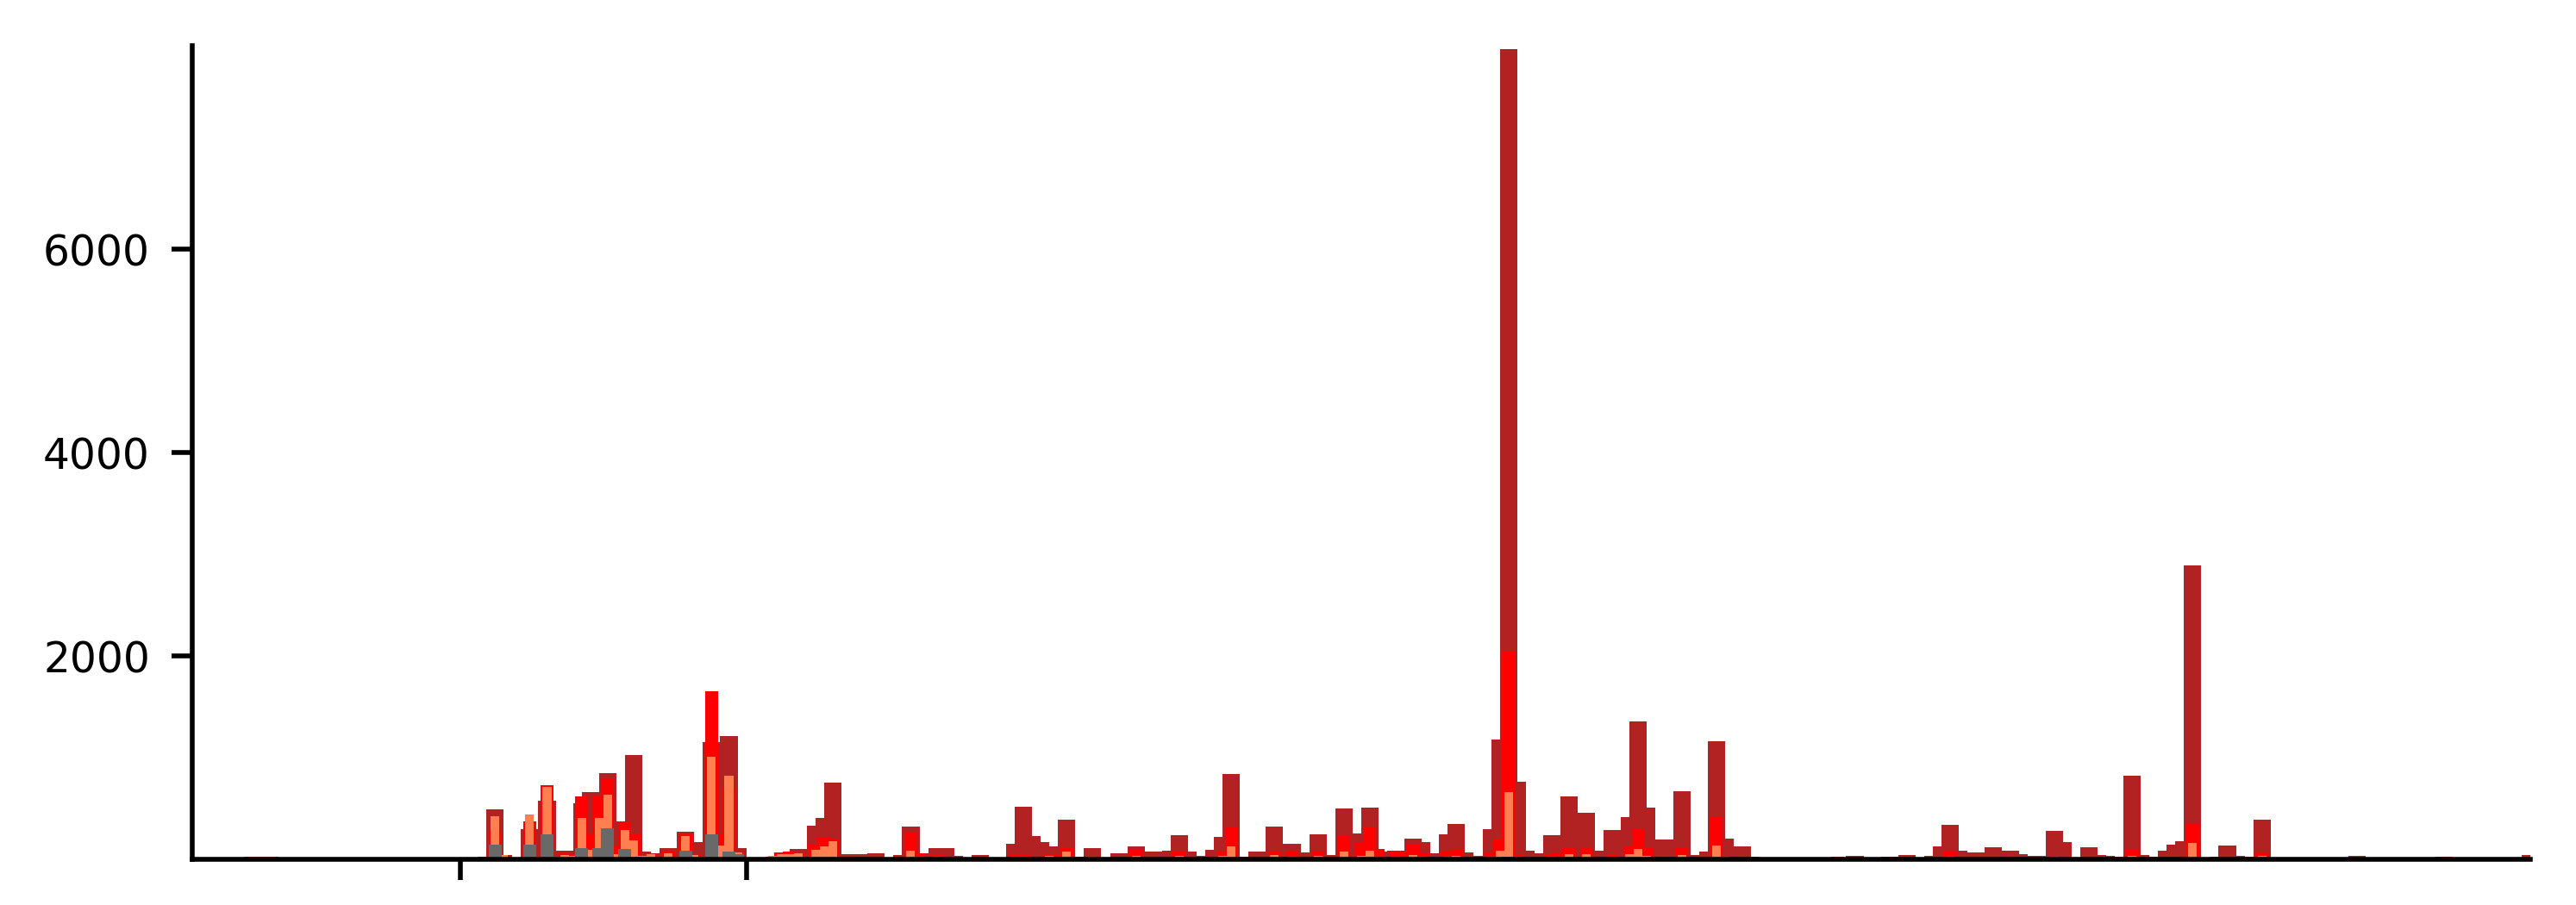

In [21]:
# for plus strand
AUG = 2753704
length = 33
up_distance = 20
down_distance = 217
upstream = AUG-up_distance
downstream = AUG+length+down_distance-1

x_data = [x for x in range (1,length+up_distance+down_distance+1)]

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(7, 2.5)
plt.xticks([up_distance+11,up_distance+length+11],['',''])
plt.xlim(0,up_distance+length+down_distance)
plt.yticks([2000,4000,6000])
plt.ylim(0,8000)
plt.tick_params(labelsize=7)
sns.despine()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

readcounts = RC['ks16'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
plt.bar(x_data,data[1], linewidth = 0, width=2, color="firebrick")

readcounts = RC['ks15'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
plt.bar(x_data,data[1], linewidth = 0, width=1.5, color="red")

readcounts = RC['ks14'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
plt.bar(x_data,data[1], linewidth = 0, width=1, color="coral")

readcounts = RC['ks13'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
plt.bar(x_data,data[1], linewidth = 0, width=1.5, color="dimgrey")

#plt.savefig('figs_rpm/fig_rpm_tmRNA_highsalt.pdf', dpi=500)

# clpP and clpX

<BarContainer object of 2123 artists>

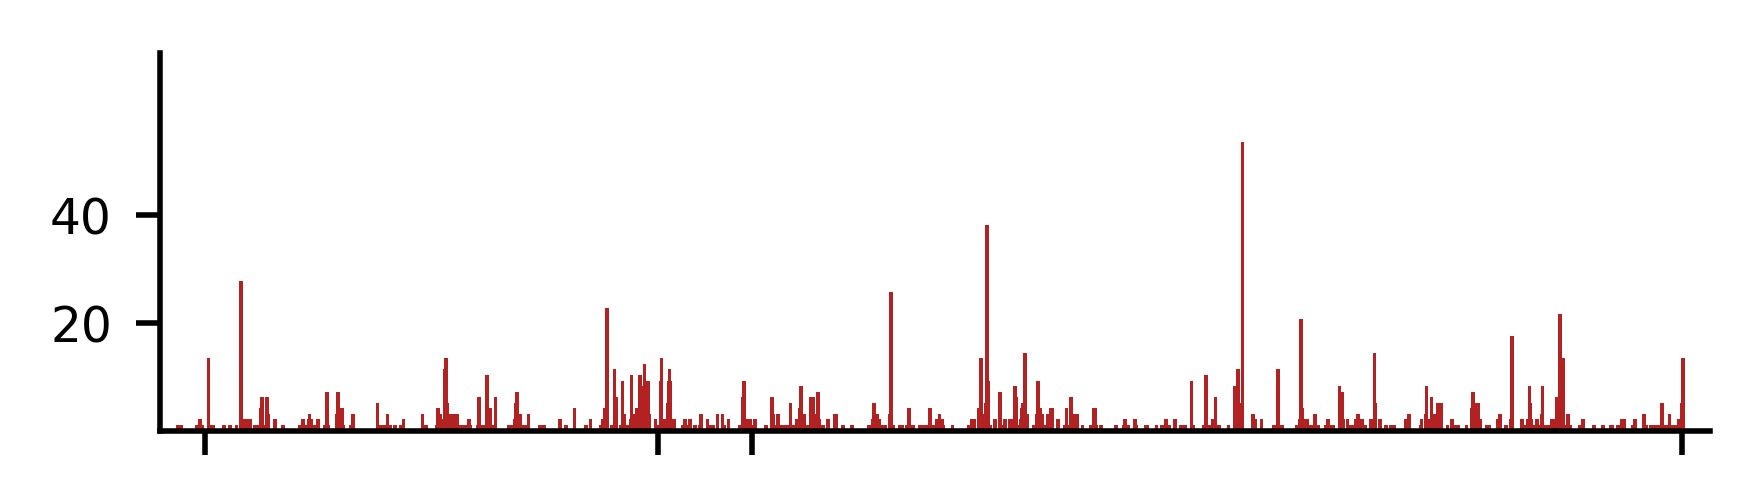

In [22]:
AUG = 455901
length = 2023
up_distance = 50
down_distance = 50
upstream = AUG-up_distance
downstream = AUG+length+down_distance-1

x_data = [x for x in range (1,length+up_distance+down_distance+1)]

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 1)
plt.xticks([up_distance+11,up_distance+621+11,up_distance+621+128+11,up_distance+length+11],['','','',''])
plt.xlim(0,up_distance+length+down_distance)
plt.yticks([20,40])
plt.ylim(0,70)
plt.tick_params(labelsize=7)
sns.despine()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

readcounts = RC['ks10'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
plt.bar(x_data,data[1], linewidth = 0, width=5, color="firebrick")

#plt.savefig('figs_rpm/fig_rpm_clpPX_normal_KD.pdf', dpi=500)

<BarContainer object of 2123 artists>

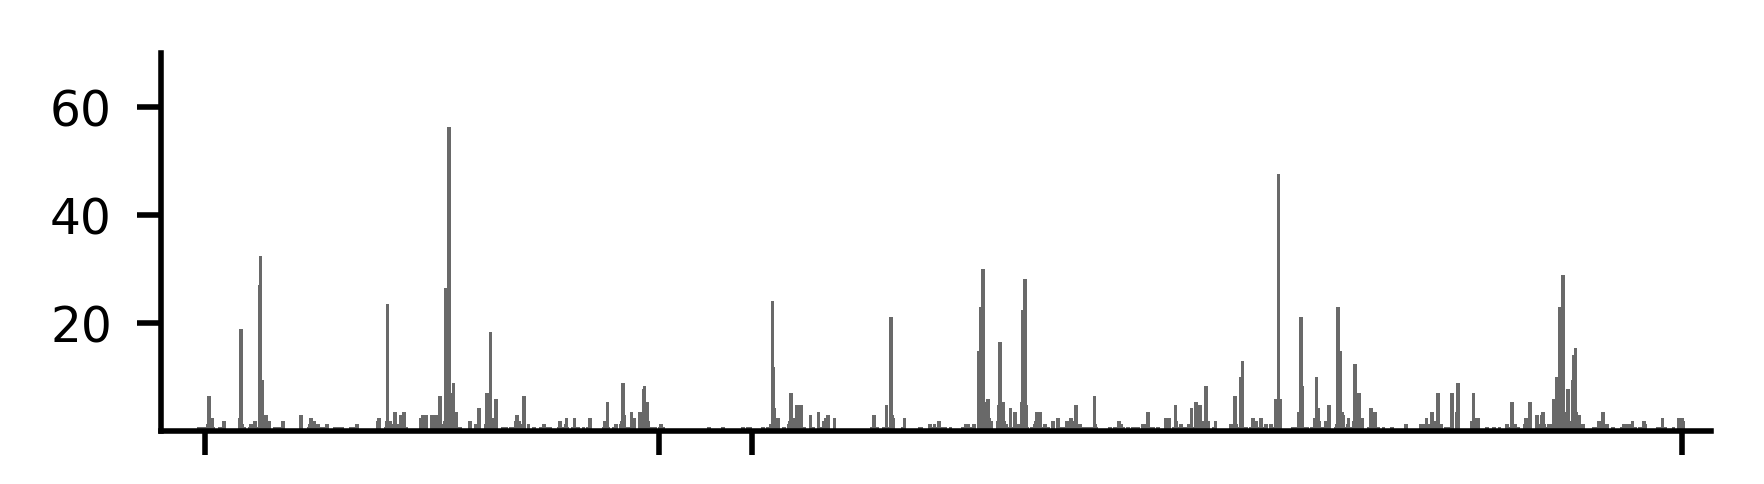

In [23]:
# rpsB
# for plus strand

AUG = 455901
length = 2023
up_distance = 50
down_distance = 50
upstream = AUG-up_distance
downstream = AUG+length+down_distance-1

x_data = [x for x in range (1,length+up_distance+down_distance+1)]

fig, ax = plt.subplots()
fig.set_dpi(500)
fig.set_size_inches(4, 1)
plt.xticks([up_distance+11,up_distance+621+11,up_distance+621+128+11,up_distance+length+11],['','','',''])
plt.xlim(0,up_distance+length+down_distance)
plt.yticks([20,40,60])
plt.ylim(0,70)
plt.tick_params(labelsize=7)
sns.despine()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

readcounts = RC['ks7'][0]['gi|49175990|ref|NC_000913.2|']
data=rpm_plot_plus(upstream, downstream, readcounts)
plt.bar(x_data,data[1], linewidth = 0, width=5, color="dimgrey")

#plt.savefig('figs_rpm/fig_rpm_clpPX_normal_WT.pdf', dpi=500)